In [ ]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual path to my dataset
df = pd.read_csv('final_df.csv')

# Display the first 10 rows of the dataset
print(df.head(10))

                                       darija  \
0        homa mkhbbyin chi haja, ana mti99en!   
1          bayna homa tay7awlo ib9aw mbrrdin.   
2      loTilat mabaynach fihom mori7in bzzaf.   
3          ghaliban ghayjrriw 3lih mn lkhdma!   
4                         Tab3an rah mkta2eb!   
5                         tayballia ghanmchi!   
6                            ara lia dak sac.   
7                                   ghanmreD!   
8        knt dima 3arf annaha bghatna nmoutou   
9  bghit n3ref ch7al b9a lia tlwe9t bach n9ra   

                                                 eng  \
0                They're hiding something, I'm sure!   
1    It's obvious they're trying to keep their cool.   
2            the hotels don't seem very comfortable.   
3  he is probably about to be laid off by head of...   
4                         of course he's depressive!   
5                        I think I'm going to leave!   
6                                  hand me that bag.   
7           

**Word Cloud Generation for Darija and English**

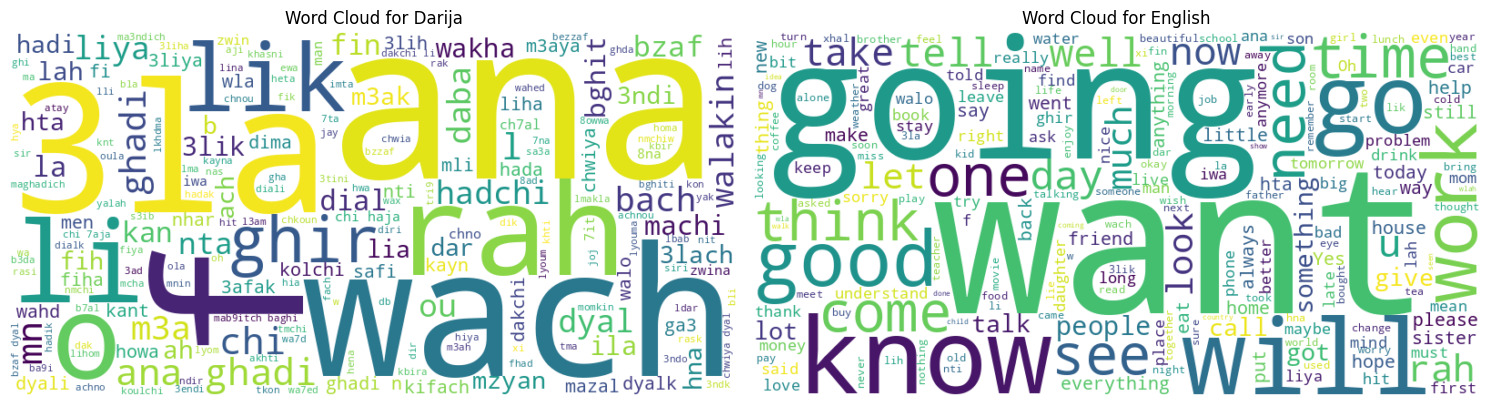

In [ ]:
from wordcloud import WordCloud

# Combine all sentences for each language
darija_text = ' '.join(df['darija'].dropna())
eng_text = ' '.join(df['eng'].dropna())

# Generate word clouds for Darija and English
wordcloud_darija = WordCloud(width=800, height=400, background_color='white').generate(darija_text)
wordcloud_eng = WordCloud(width=800, height=400, background_color='white').generate(eng_text)

# Plotting the word clouds side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].imshow(wordcloud_darija, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Word Cloud for Darija')

ax[1].imshow(wordcloud_eng, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Word Cloud for English')

plt.tight_layout()
plt.show()

**Sentence Length Distribution for Both Languages**

<ipython-input-21-f432dd0aa97a>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sentence_lengths = df[['darija', 'eng']].applymap(lambda x: len(x.split()) if isinstance(x, str) else 0)


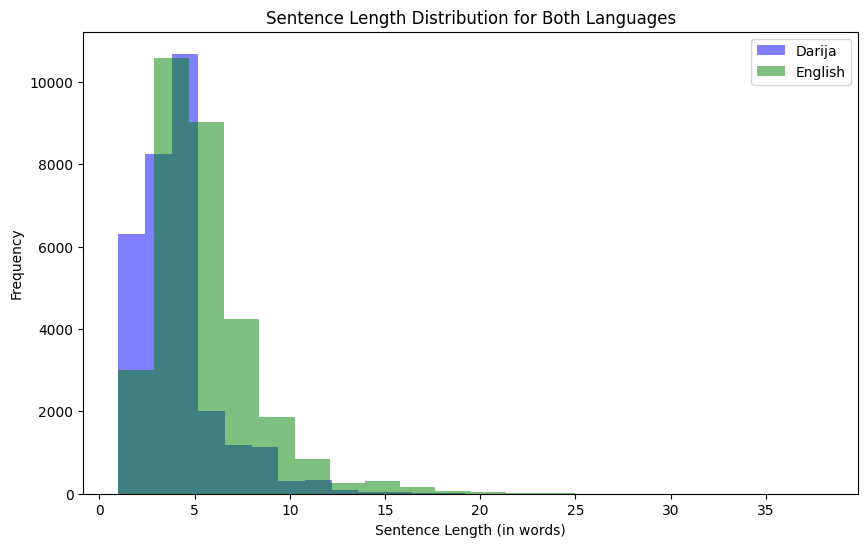

In [ ]:
# Calculate the length of sentences for both languages
sentence_lengths = df[['darija', 'eng']].applymap(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Plot sentence length distribution across the dataset
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths['darija'], bins=20, color='blue', alpha=0.5, label='Darija')
plt.hist(sentence_lengths['eng'], bins=20, color='green', alpha=0.5, label='English')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.title('Sentence Length Distribution for Both Languages')
plt.legend()
plt.show()

**Vocabulary Size Comparison: Darija vs English**

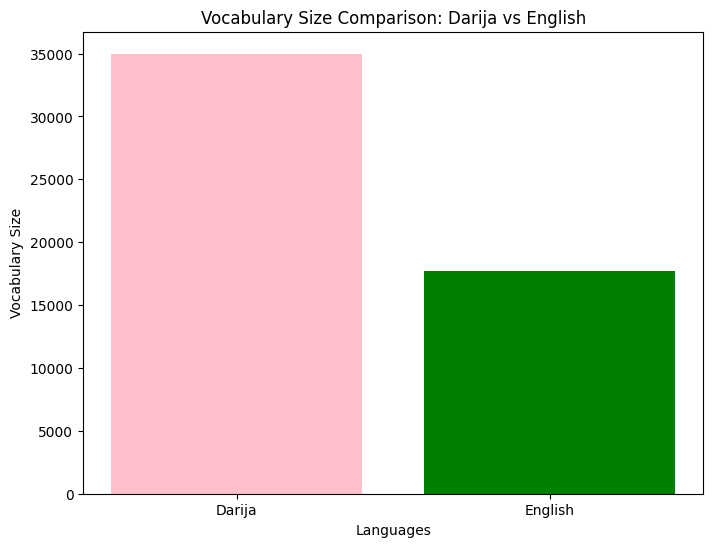

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of unique words in 'darija' and 'eng' columns
darija_vocab = set(' '.join(df['darija'].dropna()).split())
eng_vocab = set(' '.join(df['eng'].dropna()).split())

# Plot the vocabulary size comparison
vocab_size = [len(darija_vocab), len(eng_vocab)]
languages = ['Darija', 'English']

plt.figure(figsize=(8, 6))
plt.bar(languages, vocab_size, color=['pink', 'green'])
plt.xlabel('Languages')
plt.ylabel('Vocabulary Size')
plt.title('Vocabulary Size Comparison: Darija vs English')
plt.show()

**Sentence Length Distribution: Darija vs English**

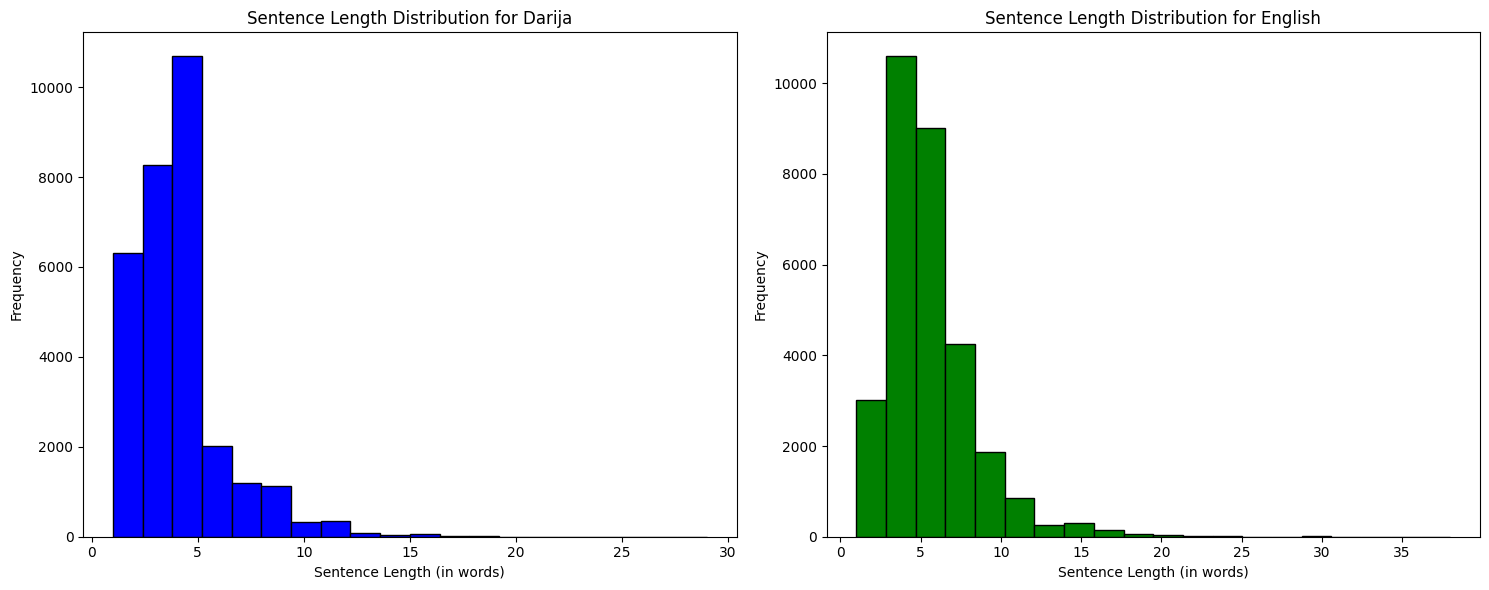

In [ ]:
import matplotlib.pyplot as plt

# Calculate sentence lengths for the 'darija' column
darija_lengths = df['darija'].dropna().apply(lambda x: len(x.split()))

# Calculate sentence lengths for the 'eng' column
eng_lengths = df['eng'].dropna().apply(lambda x: len(x.split()))

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot the sentence length distribution for Darija on the first subplot
ax[0].hist(darija_lengths, bins=20, color='blue', edgecolor='black')
ax[0].set_xlabel('Sentence Length (in words)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Sentence Length Distribution for Darija')

# Plot the sentence length distribution for English on the second subplot
ax[1].hist(eng_lengths, bins=20, color='green', edgecolor='black')
ax[1].set_xlabel('Sentence Length (in words)')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Sentence Length Distribution for English')

# Display the plot
plt.tight_layout()
plt.show()

**Sentence Length Comparison: Darija vs English (Boxplot)**

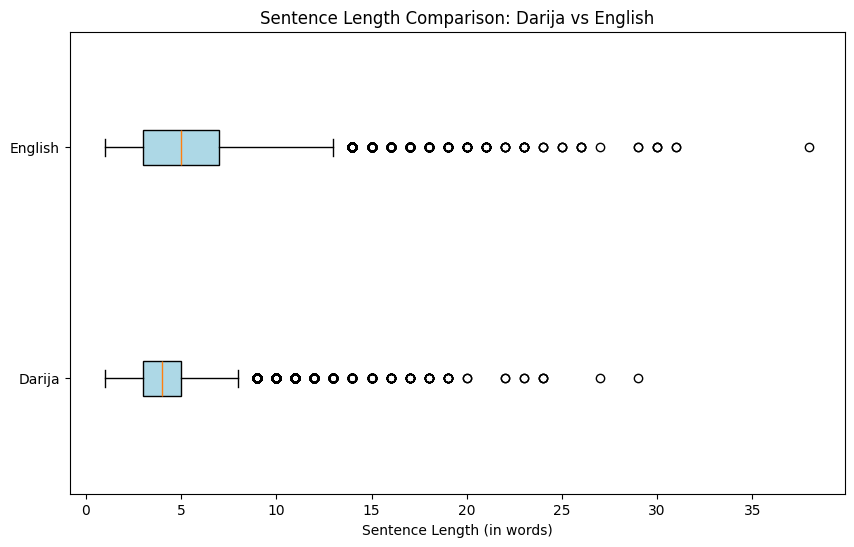

In [ ]:
# Compare sentence length distribution for 'darija' and 'eng' columns
sentence_lengths = [darija_lengths, eng_lengths]
languages = ['Darija', 'English']

plt.figure(figsize=(10, 6))
plt.boxplot(sentence_lengths, vert=False, patch_artist=True, labels=languages,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'))
plt.xlabel('Sentence Length (in words)')
plt.title('Sentence Length Comparison: Darija vs English')
plt.show()

**Top 10 Most Frequent Bigrams in Darija and English**



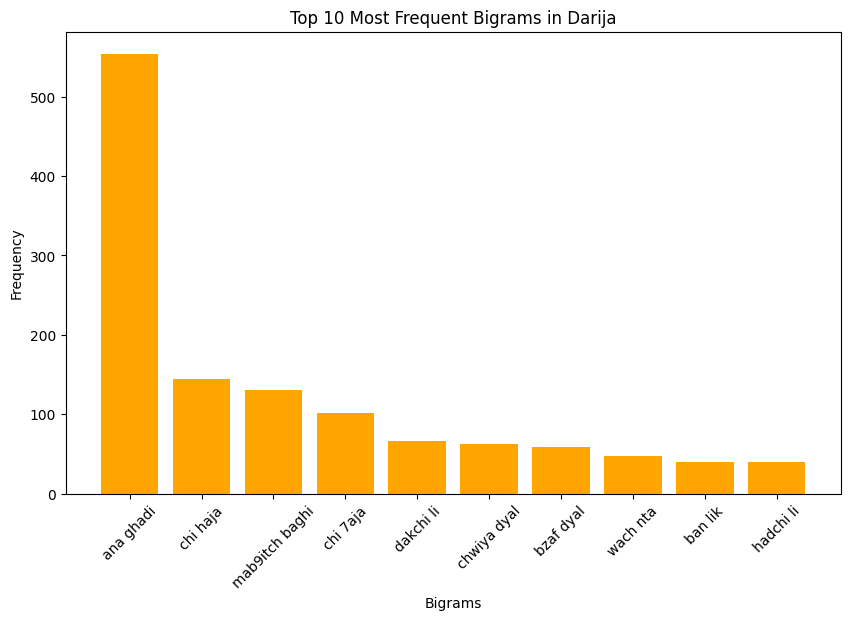

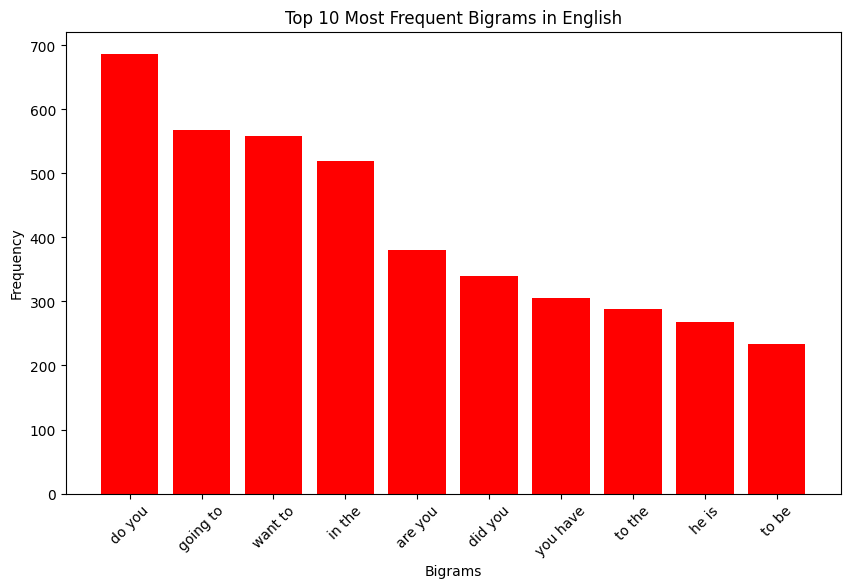

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Get the top 10 bigrams for Darija
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=None)
X_darija = vectorizer.fit_transform(df['darija'].dropna())
bigrams_darija = vectorizer.get_feature_names_out()
bigram_freq_darija = X_darija.toarray().sum(axis=0)
bigram_freq_darija = dict(zip(bigrams_darija, bigram_freq_darija))

# Sort and get top 10 bigrams
top_10_bigrams_darija = sorted(bigram_freq_darija.items(), key=lambda x: x[1], reverse=True)[:10]
bigrams, counts = zip(*top_10_bigrams_darija)

# Plot the top 10 bigrams in Darija
plt.figure(figsize=(10, 6))
plt.bar(bigrams, counts, color='orange')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Bigrams in Darija')
plt.xticks(rotation=45)
plt.show()

# Repeat the same for English bigrams
X_eng = vectorizer.fit_transform(df['eng'].dropna())
bigrams_eng = vectorizer.get_feature_names_out()
bigram_freq_eng = X_eng.toarray().sum(axis=0)
bigram_freq_eng = dict(zip(bigrams_eng, bigram_freq_eng))

top_10_bigrams_eng = sorted(bigram_freq_eng.items(), key=lambda x: x[1], reverse=True)[:10]
bigrams, counts = zip(*top_10_bigrams_eng)

plt.figure(figsize=(10, 6))
plt.bar(bigrams, counts, color='red')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Bigrams in English')
plt.xticks(rotation=45)
plt.show()

**Bilingual Sentence Lengths: Darija vs English**

<ipython-input-13-dd23d0821117>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(df_pairs.head().applymap(lambda x: len(x.split())), annot=True, cmap='coolwarm')


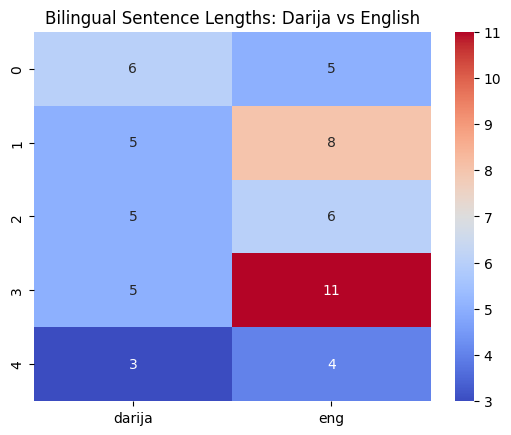

In [ ]:
import seaborn as sns

# Create a simple dataframe to show sentence pairs (Darija vs English)
df_pairs = df[['darija', 'eng']].dropna()

# Show the first few rows to give a preview
sns.heatmap(df_pairs.head().applymap(lambda x: len(x.split())), annot=True, cmap='coolwarm')
plt.title('Bilingual Sentence Lengths: Darija vs English')
plt.show()

**Character Length Distribution for Both Languages**

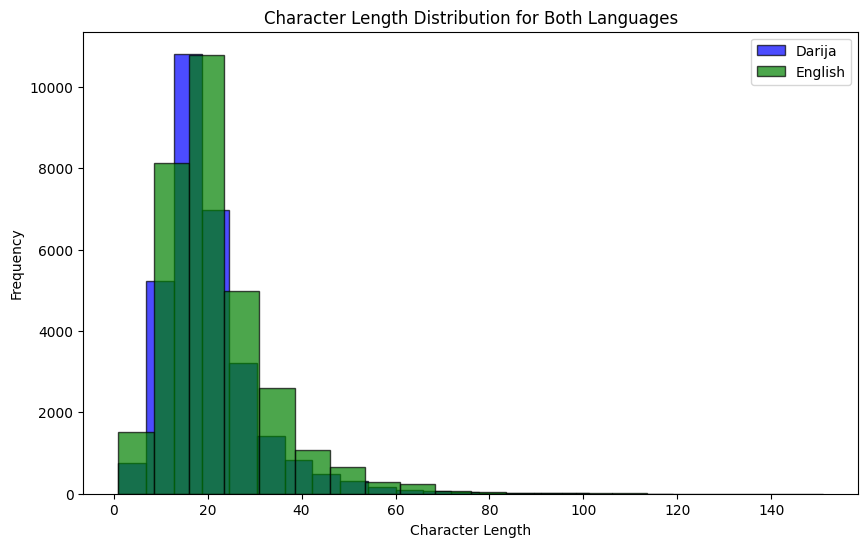

In [ ]:
# Calculate sentence lengths in characters for both languages
darija_char_lengths = df['darija'].dropna().apply(lambda x: len(x.replace(' ', '')))
eng_char_lengths = df['eng'].dropna().apply(lambda x: len(x.replace(' ', '')))

# Plot the character length distribution
plt.figure(figsize=(10, 6))
plt.hist(darija_char_lengths, bins=20, color='blue', edgecolor='black', alpha=0.7, label='Darija')
plt.hist(eng_char_lengths, bins=20, color='green', edgecolor='black', alpha=0.7, label='English')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Character Length Distribution for Both Languages')
plt.legend()
plt.show()

**Punctuation Count Comparison: Darija vs English**

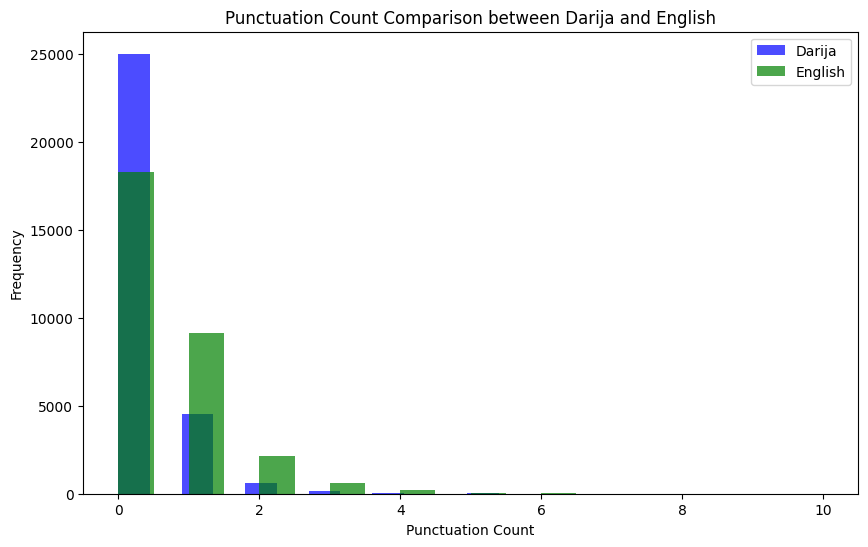

In [ ]:
# Count punctuation marks in sentences
import string

# Function to count punctuation marks in a sentence
def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

# Apply punctuation count to both languages
darija_punctuation_count = df['darija'].dropna().apply(count_punctuation)
eng_punctuation_count = df['eng'].dropna().apply(count_punctuation)

# Plot punctuation count comparison
plt.figure(figsize=(10, 6))
plt.hist(darija_punctuation_count, bins=20, color='blue', alpha=0.7, label='Darija')
plt.hist(eng_punctuation_count, bins=20, color='green', alpha=0.7, label='English')
plt.xlabel('Punctuation Count')
plt.ylabel('Frequency')
plt.title('Punctuation Count Comparison between Darija and English')
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import re
from collections import Counter

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the CSV dataset
csv_file = 'final_df.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

# Data Preprocessing
def clean_text(text, language='darija'):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    if language == 'darija':
        text = re.sub(r'(.)\1+', r'\1', text)  # Collapse repeated chars
    return text

def validate_data(darija_sentence, eng_sentence):
    return bool(darija_sentence and eng_sentence)

def calculate_word_frequencies(sentences):
    all_words = " ".join(sentences).split()
    return Counter(all_words)

def filter_sentences(darija_sentences, eng_sentences, darija_freq, eng_freq, threshold=10):
    rare_darija_words = {word for word, count in darija_freq.items() if count < threshold}
    rare_eng_words = {word for word, count in eng_freq.items() if count < threshold}

    filtered_darija, filtered_eng = [], []
    for darija, eng in zip(darija_sentences, eng_sentences):
        if not (set(darija.split()) & rare_darija_words or set(eng.split()) & rare_eng_words):
            filtered_darija.append(darija)
            filtered_eng.append(eng)
    return filtered_darija, filtered_eng

# Clean and Filter Data
valid_data = []
for _, row in df.iterrows():
    darija = row['darija']
    eng = row['eng']
    if validate_data(darija, eng):
        cleaned_eng = clean_text(eng, 'english')
        cleaned_darija = f"<start> {clean_text(darija, 'darija')} <end>"
        valid_data.append((cleaned_eng, cleaned_darija))

# Extract darija and english sentences
darija_sentences = [item[1] for item in valid_data]
eng_sentences = [item[0] for item in valid_data]

# Calculate word frequencies for both languages
darija_freq = calculate_word_frequencies(darija_sentences)
eng_freq = calculate_word_frequencies(eng_sentences)

# Filter sentences based on word frequencies
filtered_darija, filtered_eng = filter_sentences(darija_sentences, eng_sentences, darija_freq, eng_freq)

# Example: print the filtered data
print(filtered_darija[:5], filtered_eng[:5])
print(f"dataset size: {len(darija_sentences)} sentences")
print(f"Filtered dataset size: {len(filtered_darija)} sentences")


# Tokenizer Class
class Tokenizer:
    def __init__(self):
        self.word_index = {"<pad>": 0, "<start>": 1, "<end>": 2, "<unk>": 3}
        self.index_word = {0: "<pad>", 1: "<start>", 2: "<end>", 3: "<unk>"}
        self.num_words = 4

    def fit_on_texts(self, texts):
        for text in texts:
            for word in text.split():
                if word not in self.word_index:
                    self.word_index[word] = self.num_words
                    self.index_word[self.num_words] = word
                    self.num_words += 1

    def texts_to_sequences(self, texts):
        return [[self.word_index.get(word, 3) for word in text.split()] for text in texts]

# Create and Fit Tokenizers
darija_tokenizer = Tokenizer()
eng_tokenizer = Tokenizer()
darija_tokenizer.fit_on_texts(filtered_darija)
eng_tokenizer.fit_on_texts(filtered_eng)

# Convert Texts to Sequences
darija_sequences = darija_tokenizer.texts_to_sequences(filtered_darija)
eng_sequences = eng_tokenizer.texts_to_sequences(filtered_eng)

# Dataset and DataLoader
class TranslationDataset(Dataset):
    def __init__(self, source, target):
        self.source = [torch.tensor(seq, dtype=torch.long) for seq in source]
        self.target = [torch.tensor(seq, dtype=torch.long) for seq in target]

    def __len__(self):
        return len(self.source)

    def __getitem__(self, idx):
        return self.source[idx], self.target[idx]

def collate_fn(batch):
    source, target = zip(*batch)
    source_padded = pad_sequence(source, batch_first=True, padding_value=0)
    target_padded = pad_sequence(target, batch_first=True, padding_value=0)
    return source_padded, target_padded

# Split your data into training and validation sets
train_size = int(0.9 * len(darija_sequences))  # 80% for training
val_size = len(darija_sequences) - train_size  # 20% for validation
train_darija, val_darija = darija_sequences[:train_size], darija_sequences[train_size:]
train_eng, val_eng = eng_sequences[:train_size], eng_sequences[train_size:]

# Create Datasets and DataLoaders
train_dataset = TranslationDataset(train_eng, train_darija)  # English as input, Darija as target
val_dataset = TranslationDataset(val_eng, val_darija)  # English as input, Darija as target

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, collate_fn=collate_fn)

# Define Encoder-Decoder Models with Dropout for Regularization
# Define Encoder-Decoder Models with Multiple LSTM Layers and Dropout for Regularization
class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        embedded = self.embedding(x)
        outputs, (hidden, cell) = self.lstm(embedded)
        return hidden, cell

class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, hidden, cell):
        x = x.unsqueeze(1)  # Convert input to 2D
        embedded = self.embedding(x)
        embedded = self.dropout(embedded)  # Apply dropout during decoding
        outputs, (hidden, cell) = self.lstm(embedded, (hidden, cell))
        predictions = self.fc(outputs.squeeze(1))
        return predictions, hidden, cell


# Initialize Models
embed_size = 1000
hidden_size = 1000
darija_vocab_size = len(darija_tokenizer.word_index)
eng_vocab_size = len(eng_tokenizer.word_index)

encoder = Encoder(eng_vocab_size, embed_size, hidden_size).to(device)  # English input
decoder = Decoder(darija_vocab_size, embed_size, hidden_size).to(device)  # Darija output

# Training Setup
criterion = nn.CrossEntropyLoss(ignore_index=0)
encoder_optimizer = optim.Adam(encoder.parameters(), lr=0.001)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=0.001)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(encoder_optimizer, step_size=10, gamma=0.5)

# Early Stopping setup
early_stop_patience = 15
best_val_accuracy = 0
epochs_without_improvement = 0

num_epochs = 100

# Training Loop with Model Saving and Validation Accuracy
for epoch in range(num_epochs):
    total_loss = 0
    total_correct = 0
    total_samples = 0

    # Training Phase
    encoder.train()
    decoder.train()

    for source, target in train_loader:
        source, target = source.to(device), target.to(device)
        hidden, cell = encoder(source)
        decoder_input = torch.full((source.size(0),), darija_tokenizer.word_index['<start>'], dtype=torch.long).to(device)

        loss = 0
        batch_correct = 0
        batch_total = 0

        for t in range(1, target.size(1)):
            output, hidden, cell = decoder(decoder_input, hidden, cell)
            loss += criterion(output, target[:, t])

            # Accuracy calculation
            predictions = torch.argmax(output, dim=1)
            mask = target[:, t] != 0  # Ignore padding tokens
            batch_correct += (predictions[mask] == target[:, t][mask]).sum().item()
            batch_total += mask.sum().item()

            decoder_input = target[:, t]

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()
        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        total_loss += loss.item()
        total_correct += batch_correct
        total_samples += batch_total

    avg_loss = total_loss / len(train_loader)
    avg_accuracy = total_correct / total_samples

    # Validation Phase
    encoder.eval()
    decoder.eval()

    val_correct = 0
    val_total = 0

    for source, target in val_loader:
        source, target = source.to(device), target.to(device)
        hidden, cell = encoder(source)
        decoder_input = torch.full((source.size(0),), darija_tokenizer.word_index['<start>'], dtype=torch.long).to(device)

        for t in range(1, target.size(1)):
            output, hidden, cell = decoder(decoder_input, hidden, cell)
            predictions = torch.argmax(output, dim=1)

            mask = target[:, t] != 0  # Ignore padding tokens
            val_correct += (predictions[mask] == target[:, t][mask]).sum().item()
            val_total += mask.sum().item()

            decoder_input = target[:, t]

    val_accuracy = val_correct / val_total

    # Early stopping check
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= early_stop_patience:
        print(f"Early stopping triggered after {epoch+1} epochs.")
        break

    scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}, Train Accuracy: {avg_accuracy*100:.2f}%, Val Accuracy: {val_accuracy*100:.2f}%")

Using device: cuda
['<start> taybalia ghanmchi <end>', '<start> ara lia dak sac <end>', '<start> simana jaya nhar lkhmis <end>', '<start> ewa bda l9raya bkri <end>', '<start> chokran a lala <end>'] ['i think im going to leave', 'hand me that bag', 'next week on thursday', 'so start studying soon', 'thank you maam']
dataset size: 30443 sentences
Filtered dataset size: 3293 sentences
Epoch 1/100 - Loss: 41.5380, Train Accuracy: 24.50%, Val Accuracy: 23.35%
Epoch 2/100 - Loss: 33.8844, Train Accuracy: 26.18%, Val Accuracy: 23.35%
Epoch 3/100 - Loss: 30.2044, Train Accuracy: 26.48%, Val Accuracy: 23.76%
Epoch 4/100 - Loss: 27.4130, Train Accuracy: 26.89%, Val Accuracy: 23.62%
Epoch 5/100 - Loss: 24.6792, Train Accuracy: 28.06%, Val Accuracy: 24.52%
Epoch 6/100 - Loss: 22.3925, Train Accuracy: 29.23%, Val Accuracy: 23.97%
Epoch 7/100 - Loss: 20.0364, Train Accuracy: 30.86%, Val Accuracy: 24.86%
Epoch 8/100 - Loss: 17.9526, Train Accuracy: 33.31%, Val Accuracy: 24.45%
Epoch 9/100 - Loss: 16.

In [ ]:
import torch

# Function to translate a sentence
def translate_sentence(sentence, encoder, decoder, eng_tokenizer, darija_tokenizer, device):
    # Tokenize and pad the sentence
    tokens = eng_tokenizer.texts_to_sequences([sentence])
    source = torch.tensor(tokens[0], dtype=torch.long).unsqueeze(0).to(device)  # Add batch dimension

    # Initialize hidden and cell states
    with torch.no_grad():
        hidden, cell = encoder(source)

    # Start the decoding process
    decoder_input = torch.tensor([darija_tokenizer.word_index['<start>']], dtype=torch.long).to(device)
    translated_sentence = []

    for _ in range(50):  # Limit to 50 tokens to avoid infinite loops
        with torch.no_grad():
            output, hidden, cell = decoder(decoder_input, hidden, cell)

        # Get the word with the highest probability
        predicted_token = torch.argmax(output, dim=1).item()

        # If we predict the <end> token, stop translating
        if predicted_token == darija_tokenizer.word_index['<end>']:
            break

        # Add predicted token to the sentence
        translated_sentence.append(darija_tokenizer.index_word[predicted_token])

        # Update decoder_input for the next step
        decoder_input = torch.tensor([predicted_token], dtype=torch.long).to(device)

    return ' '.join(translated_sentence)

# Example list of sentences
sentences = [
    "thank you so much",
    "im very tired",
    "hand me the bag",
    "lets go"
]

# Function to translate sentences
def translate_sentences(sentences, encoder, decoder, eng_tokenizer, darija_tokenizer, device):
    translations = []
    for sentence in sentences:
        translated = translate_sentence(sentence, encoder, decoder, eng_tokenizer, darija_tokenizer, device)
        translations.append((sentence, translated))
    return translations

# Translate the list of sentences
translated_sentences = translate_sentences(sentences, encoder, decoder, eng_tokenizer, darija_tokenizer, device)

# Print results
for original, translated in translated_sentences:
    print(f"Original English: {original}")
    print(f"Translated Darija: {translated}\n")


Original English: thank you so much
Translated Darija: chokran bzaf

Original English: im very tired
Translated Darija: 3yit bzaf

Original English: hand me the bag
Translated Darija: 3tini nchof sac

Original English: lets go
Translated Darija: yalah

